# Ciência dos Dados - PROJETO 1

## Pedro Oliveira de Azambuja

## O Crescimento do acesso a Internet

## Introdução

Nesse projeto analisarei se a classe social de um indivíduo ainda é ou se está deixando de ser um fator que determina se ele possui acesso a Internet ou não.

In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [75]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/pedroazambuja/Ciencia dos Dados


# PNAD DE 2013

In [76]:
DOM2013 = pd.read_csv('DOM2013.csv',sep=',')
dados2013 = DOM2013.loc[:,["UF","V02322","V4614","V4621"]]

#Filtrando para o Estado de SP
dados2013 = dados2013[dados2013.UF == 35]


#Mudando a categoria das variáveis
dados2013.V02322 = dados2013.V02322.astype("category")


#Rotulando os valores
dados2013.V02322.cat.categories = (['sim', 'não'])


#Rotulando as colunas
dados2013 = dados2013.rename(columns={"V02322":"acesso_a_Internet"})
dados2013 = dados2013.rename(columns={"V4614":"Renda_Domiciliar"})
dados2013 = dados2013.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2013=dados2013[dados2013["Renda_Domiciliar"]!= 999999999999.0]
dados2013=dados2013[dados2013["Renda_per_capita"]!= 999999999999.0]


dados2013 = dados2013[pd.notnull(dados2013.acesso_a_Internet)&pd.notnull(dados2013.Renda_Domiciliar)\
                               &pd.notnull(dados2013.Renda_per_capita)]

dados2013.to_csv("resumo.csv")


# PNAD DE 2014

In [77]:
#OBJ: Analisar como cresceu relativamente o acesso a Internet entre as classes sociais em 2013,2014,2015
#Obj1 : Analisar a discrepância do acesso a internet entre as faixas de riqueza
#Obj2 : Se crescimentos de renda são acompanhados de crescimentos no acesso a Internet

DOM2014 = pd.read_csv('DOM2014.csv',sep=',')
dados2014 = DOM2014.loc[:,["UF","V02322","V4614","V4621"]]

#Filtrando para o Estado de SP
dados2014 = dados2014[dados2014.UF == 35]


#Mudando a categoria das variáveis
dados2014.V02322 = dados2014.V02322.astype("category")


#Rotulando os valores
dados2014.V02322.cat.categories = (['sim', 'não'])


#Rotulando as colunas
dados2014 = dados2014.rename(columns={"V02322":"acesso_a_Internet"})
dados2014 = dados2014.rename(columns={"V4614":"Renda_Domiciliar"})
dados2014 = dados2014.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2014=dados2014[dados2014["Renda_Domiciliar"]!= 999999999999.0]
dados2014=dados2014[dados2014["Renda_per_capita"]!= 999999999999.0]


dados2014 = dados2014[pd.notnull(dados2014.acesso_a_Internet)&pd.notnull(dados2014.Renda_Domiciliar)\
                               &pd.notnull(dados2014.Renda_per_capita)]

dados2014.to_csv("resumo2.csv")


# PNAD 2015

In [78]:
DOM2015 = pd.read_csv('DOM2015.csv',sep=',')
dados2015 = DOM2015.loc[:,["UF","V02322","V4614","V4621"]]

#Filtrando para o Estado de SP
dados2015 = dados2015[dados2015.UF == 35]


#Mudando a categoria das variáveis
dados2015.V02322 = dados2015.V02322.astype("category")


#Rotulando os valores
dados2015.V02322.cat.categories = (['sim', 'não'])


#Rotulando as colunas
dados2015 = dados2015.rename(columns={"V02322":"acesso_a_Internet"})
dados2015 = dados2015.rename(columns={"V4614":"Renda_Domiciliar"})
dados2015 = dados2015.rename(columns={"V4621":"Renda_per_capita"})


#Filtrando os valores não declarados de Renda
dados2015=dados2015[dados2015["Renda_Domiciliar"]!= 999999999999.0]
dados2015=dados2015[dados2015["Renda_per_capita"]!= 999999999999.0]


dados2015 = dados2015[pd.notnull(dados2015.acesso_a_Internet)&pd.notnull(dados2015.Renda_Domiciliar)\
                               &pd.notnull(dados2015.Renda_per_capita)]

dados2015.to_csv("resumo3.csv")


# Classificação da Renda em faixas sociais

In [79]:
#Valores das classes sociais(de acordo com o site G1)
baixa = 441
media = 1019
alta = 2480

#2013
dados2013.loc[dados2013.Renda_per_capita < baixa, "classe"] = "baixa"
dados2013.loc[dados2013.Renda_per_capita > baixa, "classe"] = "média baixa"
dados2013.loc[(dados2013.Renda_per_capita > media)&(dados2014.Renda_per_capita<alta),'classe'] = 'média'
dados2013.loc[dados2013.Renda_per_capita > alta, "classe"] = "alta"

#2014
dados2014.loc[dados2014.Renda_per_capita < baixa, "classe"] = "baixa"
dados2014.loc[dados2014.Renda_per_capita > baixa, "classe"] = "média baixa"
dados2014.loc[(dados2014.Renda_per_capita > media)&(dados2014.Renda_per_capita<alta),'classe'] = 'média'
dados2014.loc[dados2014.Renda_per_capita > alta, "classe"] = "alta"

#2015
dados2015.loc[dados2015.Renda_per_capita < baixa, "classe"] = "baixa"
dados2015.loc[dados2015.Renda_per_capita > baixa, "classe"] = "média baixa"
dados2015.loc[(dados2015.Renda_per_capita > media)&(dados2014.Renda_per_capita<alta),'classe'] = 'média'
dados2015.loc[dados2015.Renda_per_capita > alta, "classe"] = "alta"



Acesso a Internet,sim,não,All
Classe Social,,,
alta,1333,198,1531
baixa,901,1172,2073
média,1351,625,1976
média baixa,3759,2662,6421
All,7344,4657,12001


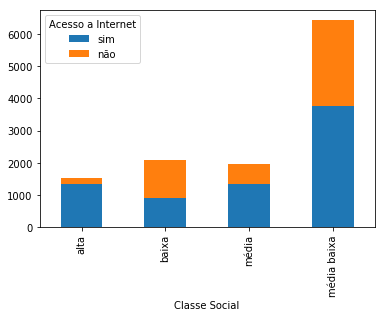

In [80]:
#funcao que converte em porcentagem
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

#crosstab acesso a internet e classe social
ct = pd.crosstab(dados2013.classe,dados2013.acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])
plot = ct.iloc[:-1,:-1].plot(kind="bar",stacked = True)
#plot.set_ylim([0,100])
plot
ct

Acesso a Internet,sim,não,All
Classe Social,,,
alta,738,455,1193
baixa,768,480,1248
média,1574,1037,2611
média baixa,1876,1118,2994
All,4956,3090,8046


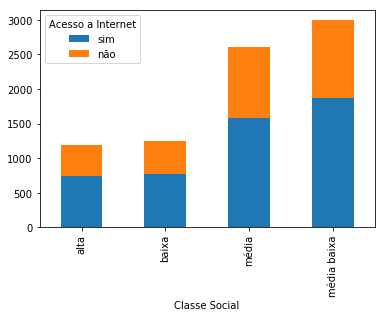

In [81]:
#crosstab acesso a internet e classe social
ct = pd.crosstab(dados2014.classe,dados2013.acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])
plot = ct.iloc[:-1,:-1].plot(kind="bar",stacked = True)
#plot.set_ylim([0,100])
plot
ct

Acesso a Internet,sim,não,All
Classe Social,,,
alta,772,429,1201
baixa,724,453,1177
média,1073,636,1709
média baixa,2464,1583,4047
All,5033,3101,8134


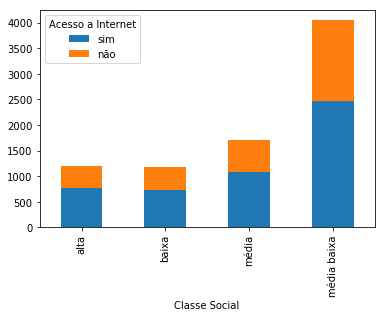

In [82]:
#crosstab acesso a internet e classe social
ct = pd.crosstab(dados2015.classe,dados2013.acesso_a_Internet,margins = True,rownames = ['Classe Social'],colnames = ['Acesso a Internet'])
plot = ct.iloc[:-1,:-1].plot(kind="bar",stacked = True)
#plot.set_ylim([0,100])
plot
ct

# Encontrando a Relação entre o acesso a Internet e a classe Social

In [83]:
def relacao(df):
    a = df[df.classe == "alta"]
    b = df[df.classe == "média baixa"]
    relacao_alta = (a.acesso_a_Internet.value_counts()[0]/(a.acesso_a_Internet.value_counts()[0] +\
    a.acesso_a_Internet.value_counts()[1]))*100
    
    relacao_baixa = (b.acesso_a_Internet.value_counts()[0]/(b.acesso_a_Internet.value_counts()[0] +\
    b.acesso_a_Internet.value_counts()[1]))*100
    
    return [relacao_alta, relacao_baixa]


print("2013:\n{0:.2f}% daqueles pertencentes a classe alta possuem acesso à Internet\n{1:.2f}% daqueles pertencentes a classe média baixa possuem acesso à Internet\n".format(relacao(dados2013)[0],relacao(dados2013)[1]))   
print("2014:\n{0:.2f}% daqueles pertencentes a classe alta possuem acesso à Internet\n{1:.2f}% daqueles pertencentes a classe média baixa possuem acesso à Internet\n".format(relacao(dados2014)[0],relacao(dados2014)[1]))   
print("2015:\n{0:.2f}% daqueles pertencentes a classe alta possuem acesso à Internet\n{1:.2f}% daqueles pertencentes a classe média baixa possuem acesso à Internet\n".format(relacao(dados2015)[0],relacao(dados2015)[1]))   


2013:
87.07% daqueles pertencentes a classe alta possuem acesso à Internet
58.54% daqueles pertencentes a classe média baixa possuem acesso à Internet

2014:
88.71% daqueles pertencentes a classe alta possuem acesso à Internet
61.97% daqueles pertencentes a classe média baixa possuem acesso à Internet

2015:
89.71% daqueles pertencentes a classe alta possuem acesso à Internet
66.97% daqueles pertencentes a classe média baixa possuem acesso à Internet



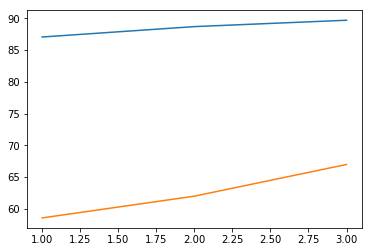

In [84]:
L1 = [relacao(dados2013)[0],relacao(dados2014)[0],relacao(dados2015)[0]]
L2 = [relacao(dados2013)[1],relacao(dados2014)[1],relacao(dados2015)[1]]

tempo = [1,2,3]

plt.plot(tempo,L1)
plt.plot(tempo,L2)

